In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Goals for this analysis

Now that we have an idea of what our customer segments look like, we can start to see if we have any patterns in consumption. Given that our deliverables should include product strategy recommendations, we want to understand what our top-selling products are, how they might vary in time and over customer segments, and understand the products themselves to see what patterns we might be able to pull out. Let's start by reading in the data we wrangled earlier in the process.

In [2]:
df = pd.read_excel('online_retail_wrangled.xlsx')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


Now, we'll create a new dataframe by concatetenating two excel tables created in previous steps - our goal here is to align Customer IDs with segment labels, which we have not done yet.

In [5]:
cust_id_df = pd.read_excel('online_retail_cust_ids.xlsx')

In [6]:
labels = pd.read_excel('labeled_data.xlsx')

In [7]:
new_df = pd.concat([cust_id_df,labels],axis=1)

In [8]:
new_df.drop(['freq','mv','rec','Unnamed: 0'],axis=1,inplace=True)

In [9]:
new_df

,Customer ID,segment
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
6004,18283,0
6005,18284,0
6006,18285,2
6007,18286,0


Now, we'll mark our customers in our original dataframe.

In [10]:
f =  new_df.set_index('Customer ID').to_dict()

In [11]:
for obj in f['segment'].keys():
    df.loc[df['Customer ID'] == obj, 'segment'] = f['segment'][obj]

In [15]:
df['segment'].value_counts()

0.0    186229
1.0    167430
2.0     76974
Name: segment, dtype: int64

In [29]:
df.loc[df['segment'].isnull(),'segment'] = 0

#### Product Analysis

We want to look at a few different aspects of our product sales. We want to know our most popular products (i.e., those purchased the most), our products with the most appeal across segments (i.e., the products that we can market across customer segments), and the highest-value products (i.e. those we gross the most sales on). We'll start by creating a pivot table.

In [113]:
pivot = pd.pivot_table(df,index='StockCode',values=['Customer ID','Quantity','Price'],aggfunc={'Customer ID':pd.Series.nunique,'Quantity':np.sum,'Price':np.max})

In [46]:
pivot

,Customer ID,Price,Quantity
StockCode,,,
10002,205,1.70,6753
10080,4,0.85,12
10109,1,0.42,4
10120,44,0.43,457
10125,68,1.70,855
...,...,...,...
gift_0001_40,2,34.04,2
gift_0001_50,2,43.48,2
gift_0001_70,1,59.57,1


In [49]:
pivot.rename(columns={'Customer ID':'num_customers'},inplace=True)

In [55]:
# Here we'll find the products that the most unique customers have purchased.
top_appeal = pivot.sort_values(by='num_customers',ascending=False).head(50).index.values

In [57]:
# Here we'll find the products that have sold the most volume.
top_quant = pivot.sort_values(by='Quantity',ascending=False).head(50).index.values

In [60]:
# Now we'll create a view from our original dataframe to read more information about the products we identified
top_appeal_info = df.loc[df['StockCode'].isin(top_appeal)]

In [61]:
top_quant_info = df.loc[df['StockCode'].isin(top_quant)]

In [63]:
top_appeal_info['Item Total'].sum()

1610700.97

In [64]:
top_quant_info['Item Total'].sum()

1133613.15

In [65]:
top_appeal_info['segment'].value_counts()

0.0    32363
1.0    21376
2.0     6913
Name: segment, dtype: int64

In [66]:
top_quant_info['segment'].value_counts()

0.0    22660
1.0    14954
2.0     5074
Name: segment, dtype: int64

For our cross-segment product popularity, we'll look at the top selling products by segment - then compare to see which products appear as top sellers for each of the 3 segments we previously identified.

In [68]:
seg0_top_quant = df.loc[df['segment'] == 0]

In [71]:
seg0_top_quant_pivot = pd.pivot_table(seg0_top_quant,index='StockCode',values='Item Total',aggfunc=np.sum)

In [74]:
seg0_top_quant_list = seg0_top_quant_pivot.sort_values(by='Item Total',ascending=False).head(50)

In [75]:
seg0_top_quant_list

,Item Total
StockCode,
22423,117371.86
85123A,101742.84
85099B,63222.18
84879,48356.94
84347,40224.19
22086,39215.11
21843,29736.60
47566,29369.79
POST,28023.39


In [76]:
seg1_top_quant = df.loc[df['segment'] == 1]

In [77]:
seg1_top_quant_pivot = pd.pivot_table(seg1_top_quant,index='StockCode',values='Item Total',aggfunc=np.sum)

In [78]:
seg1_top_quant_list = seg1_top_quant_pivot.sort_values(by='Item Total',ascending=False).head(50)

In [79]:
seg1_top_quant_list

,Item Total
StockCode,
85123A,45932.93
22423,39079.28
85099B,22776.90
M,21451.71
84879,21095.84
48138,18876.93
22086,15724.01
POST,13888.85
21754,12249.36


In [80]:
seg2_top_quant = df.loc[df['segment'] == 2]

In [81]:
seg2_top_quant_pivot = pd.pivot_table(seg2_top_quant,index='StockCode',values='Item Total',aggfunc=np.sum)

In [82]:
seg2_top_quant_list = seg2_top_quant_pivot.sort_values(by='Item Total',ascending=False).head(50)

In [83]:
seg2_top_quant_list

,Item Total
StockCode,
M,31827.85
84467,14077.86
85123A,8149.75
47566,8121.74
20748,7224.95
22423,6600.32
ADJUST,5973.69
20747,5162.03
POST,4180.12


In [84]:
seg0_items = seg0_top_quant_list.index.values
seg1_items = seg1_top_quant_list.index.values
seg2_items = seg2_top_quant_list.index.values

In [90]:
set_items = set(np.concatenate((seg0_items,seg1_items,seg2_items)))

In [106]:
df.loc[df['StockCode'].isin(set_items)]['Item Total'].sum()

2463495.75

In [107]:
df['Item Total'].sum()

9457043.624

In [109]:
top_items_pivot = pd.pivot_table(df.loc[df['StockCode'].isin(set_items)],index=['InvoiceDate','StockCode'],values='Item Total',aggfunc=np.sum)

In [114]:
# This pivot table will give us the total value of the top cross-segment products.
top_items_pivot

Item Total
InvoiceDate         StockCode            
2009-12-01 07:45:00 21232           30.00
                    21523           59.50
2009-12-01 09:06:00 21181           25.20
                    21754           17.85
                    21755           98.10
...                                   ...
2010-12-09 19:32:00 22197            1.70
                    22910           29.50
                    84879           27.04
                    84029E           7.50
2010-12-09 20:01:00 21931            3.90

[69892 rows x 1 columns]

Text(0.5, 1.0, 'Checking Seasonality in Popular Product Purchases')

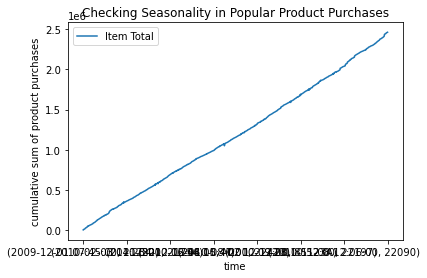

In [115]:
top_items_pivot.cumsum().plot()
plt.xlabel('time')
plt.ylabel('cumulative sum of product purchases')
plt.title('Checking Seasonality in Popular Product Purchases')

Based on the smooth slope of the above, there isn't really a seasonality to these sales - that bodes well for us, as a constant demand for these products could make sales more sensitive to promotions, deals, and other marketing  strategies. 

#### Product Correlation

Because we have extra time before our analytical contract runs out, we're going to look at the top-selling products and see if there are any patterns in customer purchases that contain them - if other products that are not themselves top sellers nevertheless consistently appear purchases with top sellers, that indicates 1) that we can cross-promote these products and therefore increase sales and 2) in general, they represent potential for increased revenue generation. Let's take a look. 

In [144]:
product_grouping = df.loc[df['Invoice'].isin(df.loc[df['StockCode'].isin(set_items), 'Invoice'])]

In [147]:
product_grouping

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total,segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,0.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,0.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,0.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,0.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,0.0
...,...,...,...,...,...,...,...,...,...,...
520622,538154,47566,PARTY BUNTING,2,2010-12-09 16:35:00,9.32,668,United Kingdom,18.64,0.0
520623,538154,82599,FANNY'S REST STOPMETAL SIGN,1,2010-12-09 16:35:00,4.21,668,United Kingdom,4.21,0.0
520624,538154,84029E,RED WOOLLY HOTTIE WHITE HEART.,5,2010-12-09 16:35:00,8.47,668,United Kingdom,42.35,0.0
520625,538154,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2010-12-09 16:35:00,8.47,668,United Kingdom,33.88,0.0


In [161]:
top_rev_gen_copurchases = product_grouping.loc[~product_grouping['StockCode'].isin(set_items)].groupby(['StockCode']).agg({'Item Total':np.sum}).sort_values(by='Item Total',ascending=False).head(50)

In [162]:
top_rev_gen_copurchases

,Item Total
StockCode,
21524,22872.05
48187,21737.87
22326,20085.92
21485,19806.42
85014B,19773.08
82486,19576.23
48111,18234.56
84997C,18179.25
22457,18102.74


The above programming notation is a bit messy with a lot of chained functions, but essentially what we are looking for are **top revenue-generating products** that are **purchased with our top-selling items**. The above chain generates the top 50 products in that vein. Now we can take a look at their descriptions:

In [166]:
copurchases = df.loc[df['StockCode'].isin(top_rev_gen_copurchases.index.values)].groupby('Description').agg({'Quantity':np.sum,'Item Total':np.sum})

In [179]:
copurchases.sort_values(by=['Item Total','Quantity'],ascending=False).head(50)

,Quantity,Item Total
Description,,
WOOD S/3 CABINET ANT WHITE FINISH,2713,20638.08
ROUND SNACK BOXES SET OF4 WOODLAND,7047,20363.21
NATURAL SLATE HEART CHALKBOARD,6539,20350.89
RECYCLING BAG RETROSPOT,9162,19765.67
VICTORIAN GLASS HANGING T-LIGHT,15884,19515.48
WOODEN PICTURE FRAME WHITE FINISH,7965,18946.72
JUMBO BAG OWLS,9746,18341.58
3 HEARTS HANGING DECORATION RUSTIC,5906,18335.00
60 TEATIME FAIRY CAKE CASES,36326,18128.25


In [180]:
top_purchases = df.loc[df['StockCode'].isin(set_items)].groupby('Description').agg({'Quantity':np.sum,'Item Total':np.sum}).sort_values(by=['Item Total','Quantity'],ascending=False).head(50)

In [181]:
top_purchases

,Quantity,Item Total
Description,,
REGENCY CAKESTAND 3 TIER,13092,163051.46
WHITE HANGING HEART T-LIGHT HOLDER,57427,155825.52
ASSORTED COLOUR BIRD ORNAMENT,44917,72454.12
PAPER CHAIN KIT 50'S CHRISTMAS,17083,57870.20
JUMBO BAG RED RETROSPOT,30306,54332.97
PARTY BUNTING,10075,49645.52
ROTATING SILVER ANGELS T-LIGHT HLDR,13675,47672.49
POSTAGE,2154,46092.36
JUMBO BAG STRAWBERRY,19818,35854.59


In the above two lists, we have the top selling items and the top selling copurchased items. These represent significant product segments in terms of revenue and volume - but to really take our analysis to the next level, let's look at items copurchased with our top sellers on an itemwise basis - i.e., which single items are most correlated with the top purchases. That will give us some strong fodder for strategic recommendations.

In [183]:
itemwise_copurchases = df.loc[df['StockCode'].isin(set_items)]['Invoice'].values

In [184]:
itemwise_copurchases = df.loc[df['Invoice'].isin(itemwise_copurchases)]

In [186]:
itemwise_copurchases

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Item Total,segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,0.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,0.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,0.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,0.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,0.0
...,...,...,...,...,...,...,...,...,...,...
520622,538154,47566,PARTY BUNTING,2,2010-12-09 16:35:00,9.32,668,United Kingdom,18.64,0.0
520623,538154,82599,FANNY'S REST STOPMETAL SIGN,1,2010-12-09 16:35:00,4.21,668,United Kingdom,4.21,0.0
520624,538154,84029E,RED WOOLLY HOTTIE WHITE HEART.,5,2010-12-09 16:35:00,8.47,668,United Kingdom,42.35,0.0
520625,538154,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2010-12-09 16:35:00,8.47,668,United Kingdom,33.88,0.0


In [219]:
set_items_dict = {}
for obj in set_items:
    desc = df.loc[df['StockCode'] == obj].iloc[0]['Description']
    set_items_dict[obj] = desc

In [220]:
set_items_dict

{48138: 'DOOR MAT UNION FLAG',
 21523: 'FANCY FONT HOME SWEET HOME DOORMAT',
 21527: 'RETRO SPOT TRADITIONAL TEAPOT ',
 'POST': 'POSTAGE',
 72741: 'GRAND CHOCOLATECANDLE',
 84016: 'FLAG OF ST GEORGE CAR FLAG',
 82484: 'WOOD BLACK BOARD ANT WHITE FINISH',
 '84968B': 'S/16 VINTAGE IVORY CUTLERY',
 48185: 'DOOR MAT FAIRY CAKE',
 48194: 'DOORMAT HEARTS',
 22083: 'PAPER CHAIN KIT RETRO SPOT',
 22086: "PAPER CHAIN KIT 50'S CHRISTMAS ",
 37449: 'CERAMIC CAKE STAND + HANGING CAKES',
 22090: 'PAPER BUNTING RETRO SPOTS',
 '85099B': 'JUMBO BAG RED WHITE SPOTTY ',
 '82494L': 'WOODEN FRAME ANTIQUE WHITE ',
 22622: 'BOX OF VINTAGE ALPHABET BLOCKS',
 22111: 'SCOTTIE DOG HOT WATER BOTTLE',
 22112: 'CHOCOLATE HOT WATER BOTTLE',
 22114: 'HOT WATER BOTTLE TEA AND SYMPATHY',
 '85123A': 'WHITE HANGING HEART T-LIGHT HOLDER',
 21621: 'VINTAGE UNION JACK BUNTING',
 21622: 'VINTAGE UNION JACK CUSHION COVER',
 21623: 'VINTAGE UNION JACK MEMOBOARD',
 22138: 'BAKING SET 9 PIECE RETROSPOT ',
 22139: 'RETRO SPOT TE

In [240]:
pairs = {}
for obj in set_items:
    target = itemwise_copurchases.loc[itemwise_copurchases['StockCode'] == obj]
    view = itemwise_copurchases.loc[itemwise_copurchases['Invoice'].isin(target['Invoice'].values)].sort_values(by=['Item Total','Quantity'],ascending=False)
    if set_items_dict[obj] == view.iloc[0]['Description']:
        pairs[set_items_dict[obj]] = view.iloc[1]['Description']
    else:
        pairs[set_items_dict[obj]] = view.iloc[0]['Description']

In [241]:
pairs

{'DOOR MAT UNION FLAG': 'KENSINGTON COFFEE SET',
 'FANCY FONT HOME SWEET HOME DOORMAT': 'KENSINGTON COFFEE SET',
 'RETRO SPOT TRADITIONAL TEAPOT ': 'HOT WATER BOTTLE BABUSHKA ',
 'POSTAGE': 'LARGE HANGING GLASS+ZINC LANTERN',
 'GRAND CHOCOLATECANDLE': 'PICNIC BASKET WICKER LARGE',
 'FLAG OF ST GEORGE CAR FLAG': 'FLAG OF ST GEORGE CAR FLAG',
 'WOOD BLACK BOARD ANT WHITE FINISH': 'MIRROR, ARCHED GEORGIAN',
 'S/16 VINTAGE IVORY CUTLERY': 'KENSINGTON COFFEE SET',
 'DOOR MAT FAIRY CAKE': 'GROW YOUR OWN PLANT IN A CAN ',
 'DOORMAT HEARTS': 'ENGLISH ROSE DESIGN QUILTED THROW',
 'PAPER CHAIN KIT RETRO SPOT': "PAPER CHAIN KIT 50'S CHRISTMAS ",
 "PAPER CHAIN KIT 50'S CHRISTMAS ": "PAPER CHAIN KIT 50'S CHRISTMAS ",
 'CERAMIC CAKE STAND + HANGING CAKES': 'CERAMIC CAKE STAND + HANGING CAKES',
 'PAPER BUNTING RETRO SPOTS': 'KENSINGTON COFFEE SET',
 'JUMBO BAG RED WHITE SPOTTY ': 'KENSINGTON COFFEE SET',
 'WOODEN FRAME ANTIQUE WHITE ': 'COLOUR GLASS. STAR T-LIGHT HOLDER',
 'BOX OF VINTAGE ALPHABET BL

Phew! The above dictionary printout gives us two things: first, one of the 50 top-selling items; and second, the item that is most often purchased with it. We can see that there are some duplicates (e.g Kensington Coffee Set), which is caused by duplicate descriptions for different stock codes. That's not a big concern to us, as there is a lot of repetition in the above - meaning that there is a lot of correlation between a relatively smaller set of items. This will help us drive revenue and real business impact!

In [253]:
comp_list = list(pairs.keys()) + (list(pairs.values()))

In [255]:
freq_list = []
for obj in set(comp_list):
    freq_list.append((obj,comp_list.count(obj)))

In [257]:
df_freq = pd.DataFrame(freq_list)

In [265]:
df_freq.rename(columns={0:'Desc',1:'Count'}).sort_values(by='Count',ascending=False).head(10)

,Desc,Count
42,KENSINGTON COFFEE SET,26
63,ENGLISH ROSE DESIGN QUILTED THROW,14
32,PAPER CHAIN KIT 50'S CHRISTMAS,13
68,POLKADOT CUTLERY 24 PCS IN TRAY,5
34,"MIRROR, ARCHED GEORGIAN",4
52,COLOUR GLASS. STAR T-LIGHT HOLDER,4
55,BLACK RECORD COVER FRAME,3
97,PINK AND LILAC QUILTED THROW,3
85,GROW YOUR OWN PLANT IN A CAN,3
30,CERAMIC CAKE STAND + HANGING CAKES,2


We're only looking at correlation, not causation, but the above list represents the 10 items that have the most interactions with others - our hypothesis being that increasing the sales of these might put positive pressure on teh sales of other items.